In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime as dt
import datetime

import code.get_mta_data as gmd
import code.process_mta_data as pmd
import code.analyze_mta_data as amd

In [3]:
mta = gmd.get_interem_ekand_v_0_1("ekand_clean_data_0.1.csv")


In [4]:
mta.DATE = pd.to_datetime(mta.DATE)

In [5]:
mta = mta.sort_values(['CA','UNIT','SCP','STATION','DATETIME'])
mta

,Unnamed: 0,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
24095,398165,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-12,00:00:00,REGULAR,6545250,2216637,2018-03-12
24096,398171,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-13,00:00:00,REGULAR,6546681,2217109,2018-03-13
24097,398177,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-14,00:00:00,REGULAR,6548069,2217661,2018-03-14
24098,398183,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-15,00:00:00,REGULAR,6549577,2218196,2018-03-15
24099,398189,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-16,00:00:00,REGULAR,6551059,2218657,2018-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234778,2971561,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-06,00:00:00,REGULAR,5554,369,2019-03-06
234779,2971567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-07,00:00:00,REGULAR,5554,369,2019-03-07
234780,2971574,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-08,00:00:00,REGULAR,5554,369,2019-03-08
250724,3173330,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-09,00:00:00,REGULAR,5554,369,2019-03-09


In [6]:

mta = pmd.add_ins_outs_to_df(mta)

In [7]:
mta = pmd.remove_outliers(mta)

In [8]:
mta

,Unnamed: 0,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,INS,OUTS
24096,398171,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-13,00:00:00,REGULAR,6546681,2217109,2018-03-13,1431.0,472.0
24097,398177,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-14,00:00:00,REGULAR,6548069,2217661,2018-03-14,1388.0,552.0
24098,398183,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-15,00:00:00,REGULAR,6549577,2218196,2018-03-15,1508.0,535.0
24099,398189,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-16,00:00:00,REGULAR,6551059,2218657,2018-03-16,1482.0,461.0
39691,593491,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-03-17,00:00:00,REGULAR,6552626,2219139,2018-03-17,1567.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234778,2971561,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-06,00:00:00,REGULAR,5554,369,2019-03-06,0.0,0.0
234779,2971567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-07,00:00:00,REGULAR,5554,369,2019-03-07,0.0,0.0
234780,2971574,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-08,00:00:00,REGULAR,5554,369,2019-03-08,0.0,0.0
250724,3173330,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-03-09,00:00:00,REGULAR,5554,369,2019-03-09,0.0,0.0


In [9]:
mta_day_grouped = amd.group_by_days(mta)

In [10]:
mta_day_grouped

INS   OUTS
CA    UNIT SCP      STATION       DATE                     
A002  R051 02-00-00 59 ST         2018-03-13  1431.0  472.0
                                  2018-03-14  1388.0  552.0
                                  2018-03-15  1508.0  535.0
                                  2018-03-16  1482.0  461.0
                                  2018-03-17  1567.0  482.0
...                                              ...    ...
TRAM2 R469 00-05-01 RIT-ROOSEVELT 2019-03-06     0.0    0.0
                                  2019-03-07     0.0    0.0
                                  2019-03-08     0.0    0.0
                                  2019-03-09     0.0    0.0
                                  2019-03-10     0.0    0.0

[409238 rows x 2 columns]

In [11]:
mta_station_grouped = amd.group_by_station(mta_day_grouped)

In [12]:
d = mta_station_grouped.reset_index().DATE[0]
type(d)

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
mta_station_freqs = amd.get_station_freqs(mta_station_grouped)

In [14]:
mta_station_freqs

INS     OUTS
STATION   DAY                  
1 AV      0    11843.0  13936.5
          1    20208.0  22394.0
          2    20618.0  23083.0
          3    21000.5  22264.5
          4    21497.0  23143.0
...                ...      ...
ZEREGA AV 2     2860.0   2554.5
          3     2813.5   2580.5
          4     2787.5   2519.0
          5     2656.0   2423.0
          6     1245.5   1270.0

[2484 rows x 2 columns]

In [15]:
mta_mean_across_weekdays = amd.mean_weekday_rankings(mta_station_freqs)

In [16]:
mta_mean_across_weekdays.head(10)

,INS,OUTS
STATION,,
34 ST-PENN STA,107404.2,97952.2
34 ST-HERALD SQ,105497.0,97377.2
14 ST-UNION SQ,93055.1,82069.5
TIMES SQ-42 ST,91969.6,83729.7
59 ST COLUMBUS,70218.0,56252.3
GRD CNTRL-42 ST,66913.7,61453.3
23 ST,66067.5,45195.9
59 ST,58157.2,48488.3
CHAMBERS ST,57178.8,41824.6


Text(0, 0.5, 'Daily Entries')

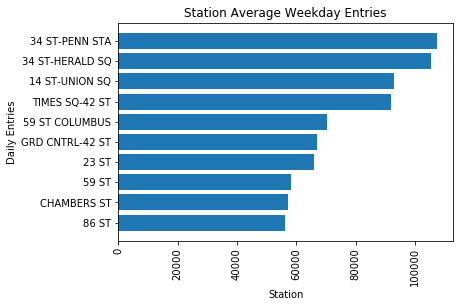

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
num_stations = 10
x = mta_mean_across_weekdays.head(num_stations).reset_index().sort_values(['INS'])['STATION']
y = mta_mean_across_weekdays.head(num_stations).reset_index().sort_values(['INS'])['INS']
plt.barh(x,y)
plt.xticks(rotation='vertical')
plt.title('Station Average Weekday Entries')
plt.xlabel('Station')                             # move the label down so dates aren't crowded
plt.ylabel('Daily Entries')

In [29]:
mta_station_freqs.groupby('DAY').agg({'INS':'sum', 'OUTS':'sum'})

INS     OUTS
STATION   DAY                  
1 AV      0    11843.0  13936.5
          1    20208.0  22394.0
          2    20618.0  23083.0
          3    21000.5  22264.5
          4    21497.0  23143.0
...                ...      ...
ZEREGA AV 2     2860.0   2554.5
          3     2813.5   2580.5
          4     2787.5   2519.0
          5     2656.0   2423.0
          6     1245.5   1270.0

[2484 rows x 2 columns]